In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import numpy as np
import pandas as pd

bf_path = 'C:\\Users\\luis.a.valcke\\Documents\\Not Work\\Practice_Problems\\Datasets\\Black Friday\\BlackFriday.csv'
bf_dataset = pd.read_csv(bf_path)
bf_dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [46]:
for column_name in bf_dataset.columns.values:
    print('Column: ' + str(column_name))
    print(bf_dataset[column_name].describe())
    print()
    print('Nulls in ' + str(column_name))
    print(bf_dataset[column_name].isna().sum())  
    print()
    print()

Column: User_ID
count    5.375770e+05
mean     1.002992e+06
std      1.714393e+03
min      1.000001e+06
25%      1.001495e+06
50%      1.003031e+06
75%      1.004417e+06
max      1.006040e+06
Name: User_ID, dtype: float64

Nulls in User_ID
0


Column: Product_ID
count        537577
unique         3623
top       P00265242
freq           1858
Name: Product_ID, dtype: object

Nulls in Product_ID
0


Column: Gender
count     537577
unique         2
top            M
freq      405380
Name: Gender, dtype: object

Nulls in Gender
0


Column: Age
count     537577
unique         7
top        26-35
freq      214690
Name: Age, dtype: object

Nulls in Age
0


Column: Occupation
count    537577.00000
mean          8.08271
std           6.52412
min           0.00000
25%           2.00000
50%           7.00000
75%          14.00000
max          20.00000
Name: Occupation, dtype: float64

Nulls in Occupation
0


Column: City_Category
count     537577
unique         3
top            B
freq      226493
Na

In [47]:
bf_dataset['Product_Category_1'].fillna(value=0,inplace=True)
bf_dataset['Product_Category_2'].fillna(value=0,inplace=True)
bf_dataset['Product_Category_3'].fillna(value=0,inplace=True)
bf_dataset['Stay_In_Current_City_Years'].value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

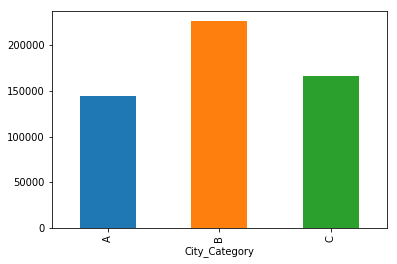

In [59]:
bf_dataset.groupby(['City_Category'])['City_Category'].count().plot(kind='bar')

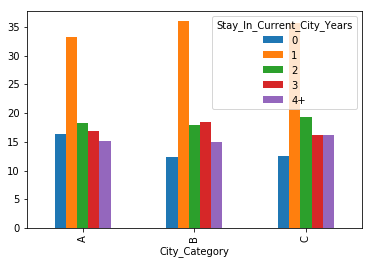

In [129]:
stay_city_counts = bf_dataset.groupby(['City_Category','Stay_In_Current_City_Years'])['City_Category'].count().rename('City_Category_Counts')

# Change: groupby state_office and divide by sum
stay_city_pcts = stay_city_counts.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
stay_city_pcts.unstack(level=-1).plot(kind='bar')

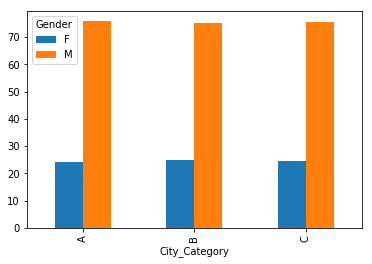

In [128]:
gender_city_counts = bf_dataset.groupby(['City_Category','Gender'])['City_Category'].count().rename('City_Category_Counts')
gender_city_pcts = gender_city_counts.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
gender_city_pcts.unstack(level=-1).plot(kind='bar')

In [140]:
marital_city_counts = bf_dataset.groupby(['City_Category','Gender','Marital_Status'])['City_Category'].count().rename('City_Category_Counts')
marital_city_counts.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

City_Category  Gender  Marital_Status
A              F       0                 14.727112
                       1                  9.337795
               M       0                 47.074075
                       1                 28.861019
B              F       0                 14.966025
                       1                  9.976909
               M       0                 44.290994
                       1                 30.766072
C              F       0                 13.082922
                       1                 11.487209
               M       0                 43.521623
                       1                 31.908247
Name: City_Category_Counts, dtype: float64

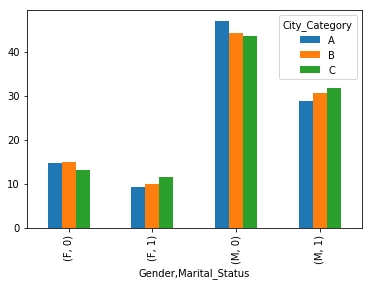

In [141]:
marital_city_pcts = marital_city_counts.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
marital_city_pcts.unstack(level=0).plot(kind='bar')

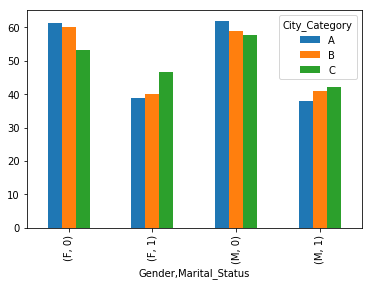

In [222]:
martial_status_city = bf_dataset.groupby(['City_Category','Gender','Marital_Status'])['City_Category'].count().rename('City_Category_Counts')
martial_status_city.groupby(['City_Category','Gender']).apply(lambda x:100 * x / float(x.sum())).unstack(level=0).plot(kind='bar')

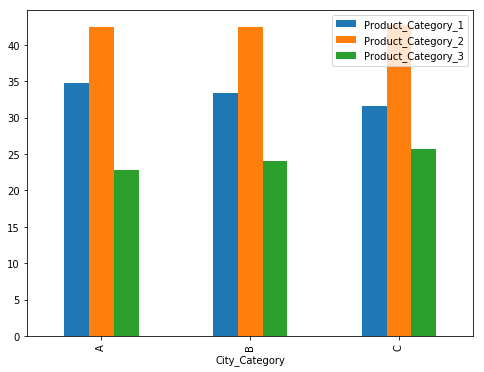

In [223]:
city_prod_spend = bf_dataset.groupby(['City_Category'])['Product_Category_1','Product_Category_2','Product_Category_3'].sum()
city_prod_spend['Total_Spend'] = city_prod_spend['Product_Category_1']+city_prod_spend['Product_Category_2']+city_prod_spend['Product_Category_3']
city_prod_spend['Product_Category_1']=city_prod_spend['Product_Category_1']/city_prod_spend['Total_Spend'] * 100
city_prod_spend['Product_Category_2']=city_prod_spend['Product_Category_2']/city_prod_spend['Total_Spend'] * 100
city_prod_spend['Product_Category_3']=city_prod_spend['Product_Category_3']/city_prod_spend['Total_Spend'] * 100
city_prod_spend.drop(columns='Total_Spend',inplace=True)
fig, ax = plt.subplots(figsize=(8,6))
bp = city_prod_spend.plot(kind='bar', ax=ax)

In [224]:
prod_spend = bf_dataset[['Product_Category_1','Product_Category_2','Product_Category_3']].sum()
prod_spend.plot(kind='bar', ax=ax)

In [127]:
bf_dataset.columns.values

array(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase'], dtype=object)

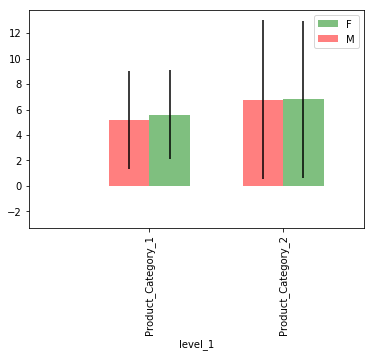

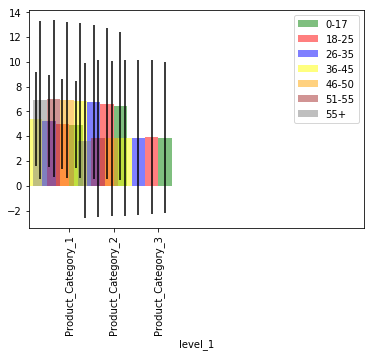

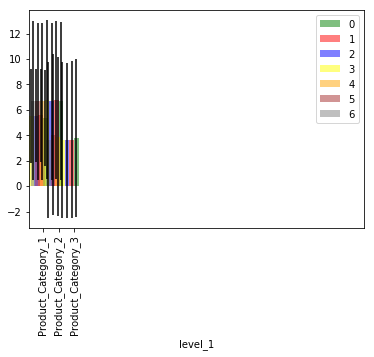

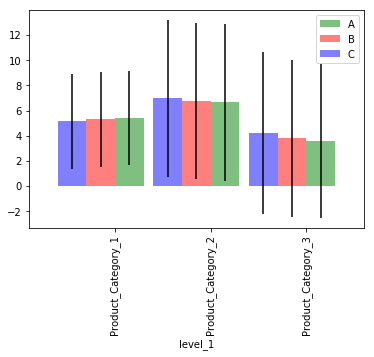

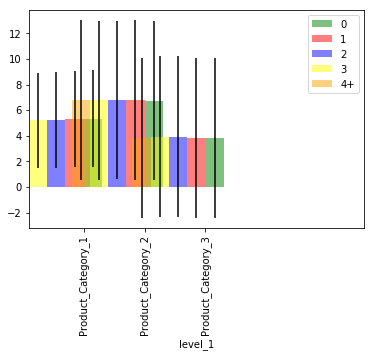

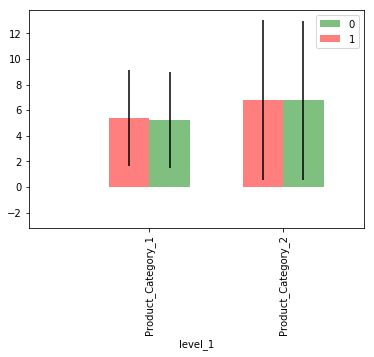

In [316]:
for level in ['Gender', 'Age', 'Occupation','City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']:
    size = len(bf_dataset[level].unique())
    df = pd.pivot_table(bf_dataset,index=level,values=['Product_Category_1','Product_Category_2','Product_Category_3'],aggfunc=['mean','std']).stack().reset_index()

    color_choices = ['green','red','blue','yellow','orange','brown','grey']
    colors = color_choices[:size]
    positions = range(0,size)

    width=0.3
    fig, ax = plt.subplots() 

    for group, color, pos in zip(df.groupby(level), colors, positions):
        key, group = group
        group.plot('level_1', 'mean', yerr='std', kind='bar', width=width, label=key, 
                   position=pos, color=color, alpha=0.5, ax=ax)

    ax.set_xlim(-width*3,max(positions)+width*2)  
    plt.show()

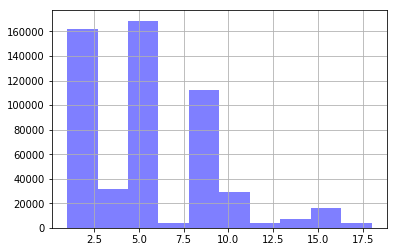

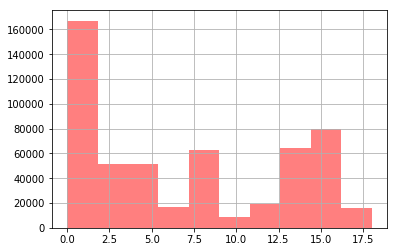

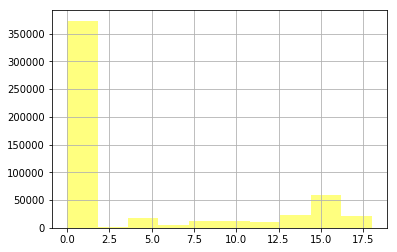

In [283]:
bf_dataset['Product_Category_1'].hist(color='blue',alpha=.5)
plt.show()
bf_dataset['Product_Category_2'].hist(color='red',alpha=.5)
plt.show()
bf_dataset['Product_Category_3'].hist(color='yellow',alpha=.5)
plt.show()